In [2]:
import pandas as pd
import scipy 
import numpy as np
import seaborn as sns
esalary= pd.read_csv(r'C:\Users\HP\Desktop\python codes\Data_sci\Assignmets\Simple linear reg\Salary_Data.csv')


In [3]:
esalary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
#sns.scatterplot(del_time.Sorting Time, del_time.Delivery Time)
esalary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
esalary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


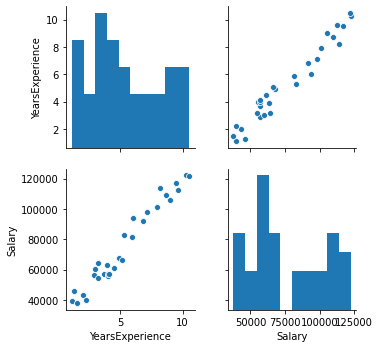

In [6]:
sns.pairplot(esalary)

In [7]:
X= esalary['YearsExperience']
Y = esalary['Salary']


<AxesSubplot:xlabel='YearsExperience'>

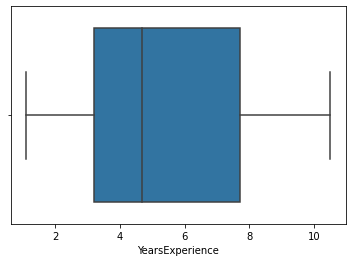

In [8]:
sns.boxplot(X)


<AxesSubplot:xlabel='Salary'>

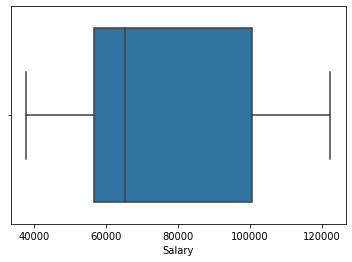

In [9]:
sns.boxplot(Y)

In [33]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
model = smf.ols(formula="YearsExperience~Salary",data=esalary).fit()

In [34]:
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [35]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           1.14e-20
Time:                        23:47:08   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
newdata=pd.Series(esalary['YearsExperience'])
data_pred=pd.DataFrame(newdata,columns=['x'])

In [37]:
y_pred = model.predict(data_pred)

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'Salary' is not defined
    YearsExperience~Salary
                    ^^^^^^

# LinearRegression

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lin=LinearRegression()

In [21]:
X=np.array (esalary['YearsExperience']).reshape(-1, 1)
Y = np.array(esalary['Salary'])

In [22]:
newmodel= lin.fit(X,Y)

In [23]:
newmodel.score(X,Y)

0.9569566641435086

In [24]:
print(f'intercept: {newmodel.intercept_ }  coeff: {newmodel.coef_}')

intercept: 25792.20019866871  coeff: [9449.96232146]


In [25]:
newmodel.intercept_

25792.20019866871

In [26]:
newmodel.coef_

array([9449.96232146])

In [27]:
y_pred = newmodel.predict(X)

In [28]:
y_pred


array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])